In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [2]:
cities=gpd.read_file(r'donneesTP1\donneesTP1\cities.shp')
counties=gpd.read_file(r'donneesTP1\donneesTP1\counties.shp')
rivers=gpd.read_file(r'donneesTP1\donneesTP1\us_rivers.shp')
lakes=gpd.read_file(r'donneesTP1\donneesTP1\us_lakes.shp')
states=gpd.read_file(r'donneesTP1\donneesTP1\states.shp')
highways=gpd.read_file(r'donneesTP1\donneesTP1\intrstat.shp')

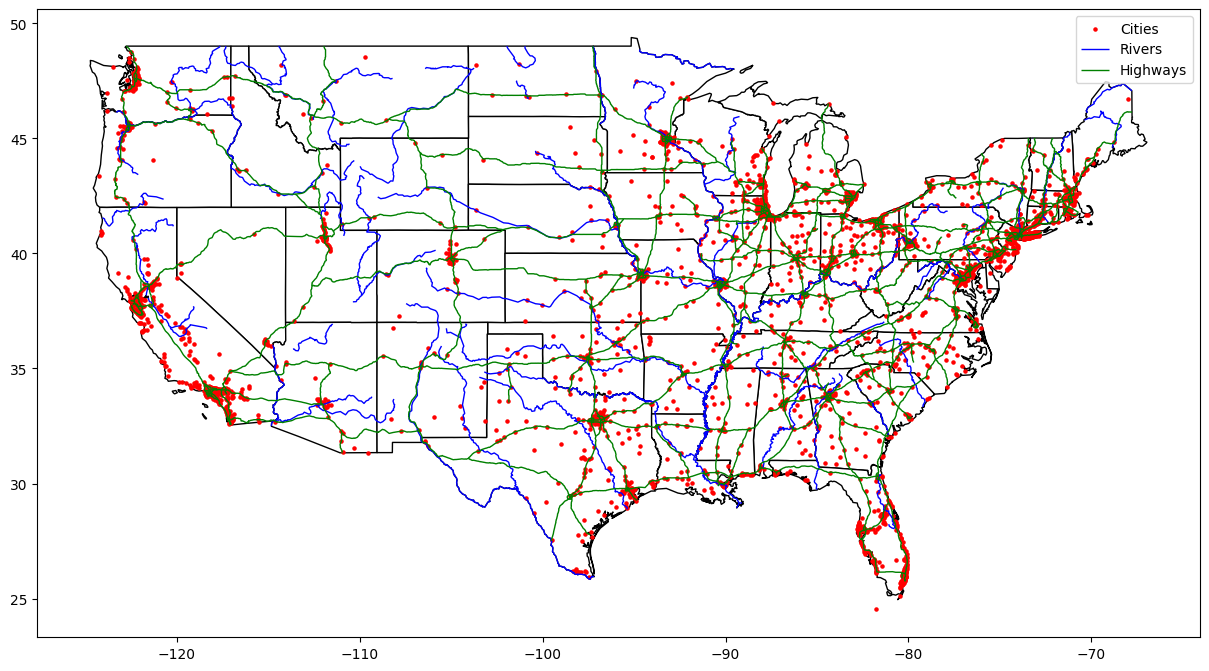

In [3]:

fig, ax = plt.subplots(figsize=(15, 15))
# Filter out Alaska and Hawaii from the states GeoDataFrame
continental_states = states[~states['STATE_NAME'].isin(['Alaska', 'Hawaii'])]

excluded_river_indices = [39, 40, 41, 42, 43, 44, 45]
continental_rivers = rivers[~rivers.index.isin(excluded_river_indices)]

continental_cities= cities[~cities['STATE_NAME'].isin(['Alaska', 'Hawaii'])]


excluded_highways= highways[~highways['ROUTE_NUM'].isin(['IA4', 'IH1','IH2','IH3','IH201'])]

base = continental_states.plot(ax=ax, color='white', edgecolor='black')

continental_cities.plot(ax=base, marker='o', color='red', markersize=5, label='Cities')
continental_rivers.plot(ax=base, color='blue', linewidth=1, label='Rivers')
excluded_highways.plot(ax=base, color='green', linewidth=1, label='Highways')

plt.legend()

plt.show()


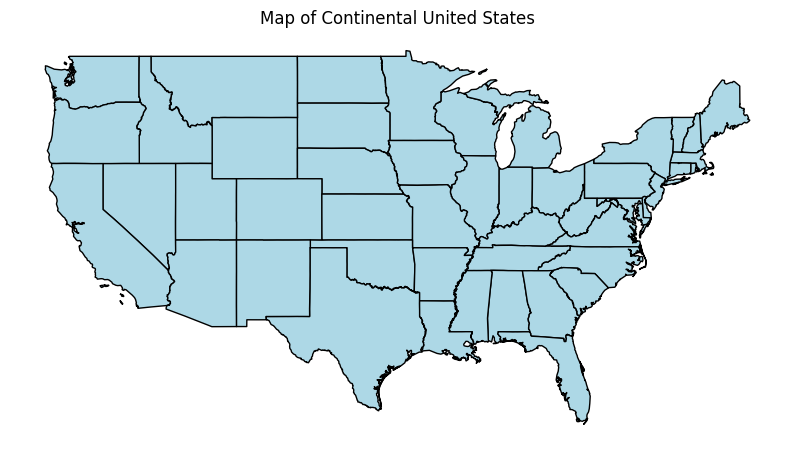

In [4]:

continental_states = states[~states['STATE_NAME'].isin(['Alaska', 'Hawaii'])]

continental_states.to_file(r'donneesTP1\donneesTP1\continental_us.shp')


# Plot the continental United States
fig, ax = plt.subplots(figsize=(10, 8))
continental_states.plot(ax=ax, color='lightblue', edgecolor='black')
ax.set_title('Map of Continental United States')
plt.axis('off') 
plt.show()


In [5]:
import os
# Create a folder to store the individual state shapefiles
output_folder = 'state_shapefiles'
os.makedirs(output_folder, exist_ok=True)

# Iterate over each state
for state_name in continental_states['STATE_NAME']:
    # Filter the data for the current state
    state_data = continental_states[continental_states['STATE_NAME'] == state_name]
    
    # Save the filtered data as a shapefile
    output_filename = os.path.join(output_folder, f'{state_name}.shp')
    state_data.to_file(output_filename)


In [6]:
continental_states.head()

,AREA,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,POP1990,POP2000,POP90_SQMI,Shape_Leng,Shape_Area,geometry
1,67290.061,Washington,53,Pacific,WA,4866692.0,5835089.0,72,34.956856,20.750758,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,147244.653,Montana,30,Mtn,MT,799065.0,885795.0,5,34.528066,45.134302,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,32161.925,Maine,23,N Eng,ME,1227928.0,1257219.0,38,18.898720,9.570698,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,70812.056,North Dakota,38,W N Cen,ND,638800.0,631032.0,9,21.353307,21.874874,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
5,77195.055,South Dakota,46,W N Cen,SD,696004.0,734993.0,9,22.746546,22.598105,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."


In [11]:
continental_states['Population_Density']=continental_states['POP2000']/continental_states['Shape_Area']

c:\Users\sayeh omar\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [13]:
# Find the minimum and maximum values of the 'Population_Density' column
min_density = continental_states['Population_Density'].min()
max_density = continental_states['Population_Density'].max()

# Print the minimum and maximum values
print("Minimum Population Density:", min_density)
print("Maximum Population Density:", max_density)


Minimum Population Density: 17151.583883178577
Maximum Population Density: 28903942.65612988


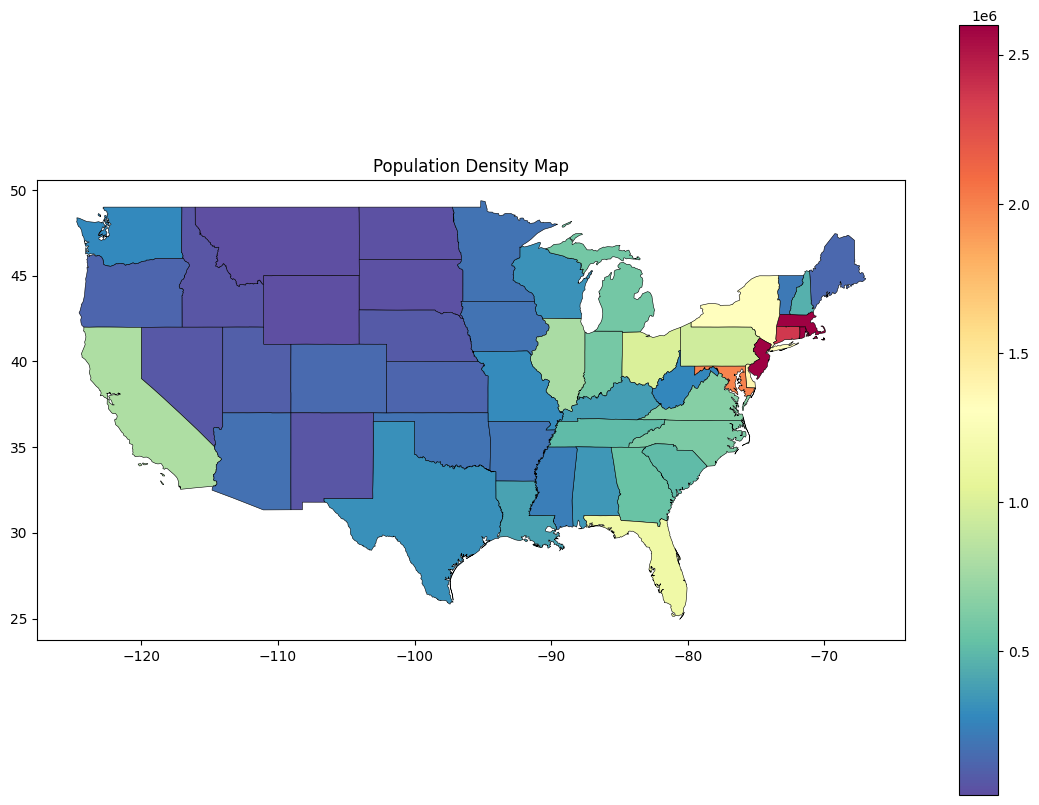

In [14]:

# Plot the map with population density, specifying vmin and vmax
fig, ax = plt.subplots(figsize=(14, 10))
continental_states.plot(column='Population_Density', cmap='Spectral_r', ax=ax, legend=True,edgecolor='black', linewidth=0.4,vmax=2600000)
ax.set_title('Population Density Map')
plt.show()


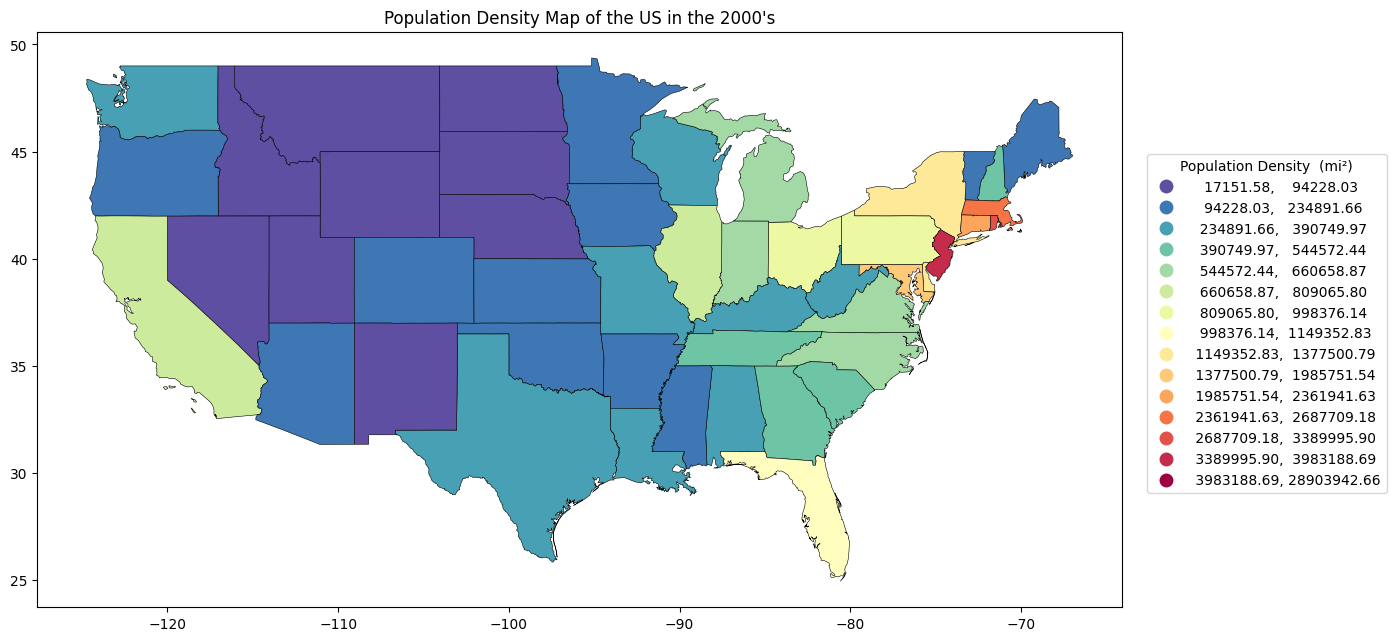

In [15]:

# Create a copy of the GeoDataFrame to avoid SettingWithCopyWarning
continental_states = continental_states.copy()
fig, ax = plt.subplots(figsize=(14, 10))

# Calculate population density
continental_states['Population_Density'] = continental_states['POP2000'] / continental_states['Shape_Area']

# Plot the map with population density in a choropleth format
continental_states.plot(column='Population_Density', cmap='Spectral_r', ax=ax, edgecolor='black', linewidth=0.4,legend=True, scheme='NaturalBreaks', k=15)
# Customize legend position and style
legend = ax.get_legend()
legend.set_title('Population Density  (mi²)')
legend.set_bbox_to_anchor((1.25, 0.8))  # Set legend position
legend.set_frame_on(True)  # Show legend frame


ax.set_title("Population Density Map of the US in the 2000's")
plt.show()


In [16]:
from folium import plugins
import folium


# Create a Folium map centered on the US
map = folium.Map(location=[37.0902, -95.7129], tiles="OpenStreetMap", zoom_start=4.2)

# Add heatmap layer to the map using population data
heat_data = [[point.y, point.x, pop] for point, pop in zip(cities.geometry, cities['POP1990'])]
folium.plugins.HeatMap(heat_data).add_to(map)
map

In [17]:
# Save the map to an HTML file
map.save('population_heatmap.html')

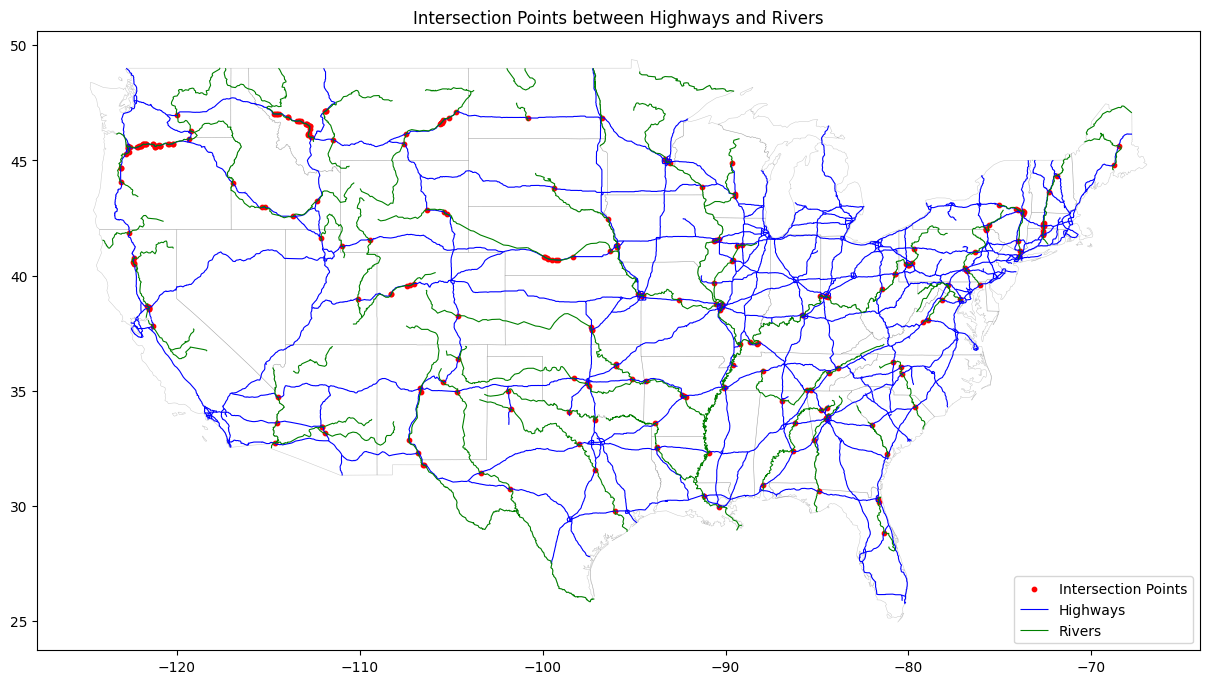

In [18]:
# Find the intersection points between highways and rivers
intersection_points = highways.unary_union.intersection(rivers.unary_union)

# Convert the intersection points to a GeoDataFrame
intersection_gdf = gpd.GeoDataFrame(geometry=[intersection_points])

# Plot the intersection points
fig, ax = plt.subplots(figsize=(15, 10))
base = continental_states.plot(ax=ax, color='white', edgecolor='black',alpha=0.2,linewidth=0.4)

intersection_gdf.plot(ax=ax, color='red', markersize=10, label='Intersection Points', marker='o')

excluded_highways.plot(ax=ax, color='blue', label='Highways',linewidth=0.8)
continental_rivers.plot(ax=ax, color='green', label='Rivers',linewidth=0.8)
plt.title('Intersection Points between Highways and Rivers')
# Move the legend to the top-right corner
plt.legend(loc='lower right')

plt.show()

C:\Users\sayeh omar\AppData\Local\Temp\ipykernel_2848\2580173392.py:19: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = axs[1].get_legend_handles_labels()  # Get handles and labels


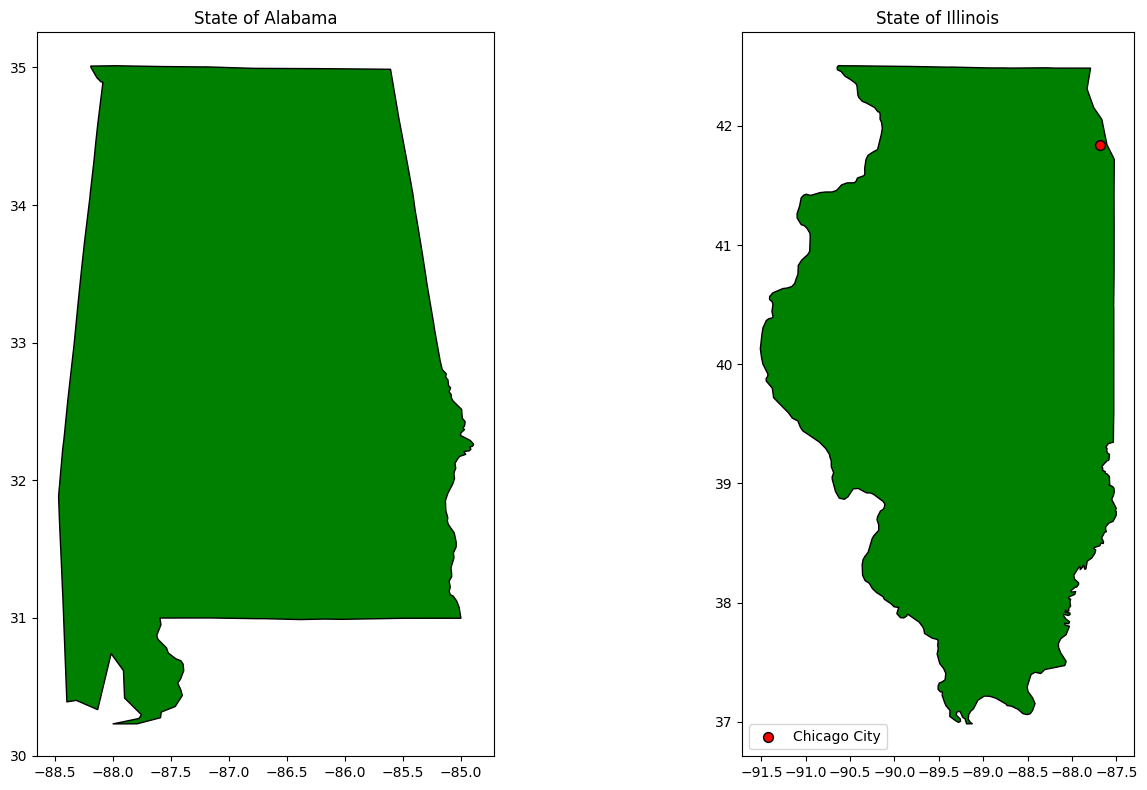

In [40]:
# Filter the geometries for Alabama, Illinois, and Chicago
alabama = continental_states[continental_states['STATE_NAME'] == 'Alabama']
illinois = continental_states[continental_states['STATE_NAME'] == 'Illinois']
chicago = cities[cities['CITY_NAME'] == 'Chicago']

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot Alabama in the first subplot
alabama.plot(ax=axs[0], color='green', edgecolor='black')
axs[0].set_title('State of Alabama')

# Plot Illinois in the second subplot
illinois.plot(ax=axs[1], color='green', edgecolor='black', label='Illinois')  # Add label for Illinois
chicago.plot(ax=axs[1], color='red', edgecolor='black', markersize=50, label='Chicago City')  # Plot Chicago within Illinois
axs[1].set_title('State of Illinois')

# Add legend
handles, labels = axs[1].get_legend_handles_labels()  # Get handles and labels
axs[1].legend(handles, labels, loc='lower left')  # Add legend to the second subplot

# Display the plot

plt.tight_layout()
plt.show()


